### 데이터 다운로드 : http://www.airkorea.or.kr/last_amb_hour_data

### 1. 데이터 수집
#### 2005년~2014년 데이터를 받음

<img src="images/airkorea.jpg">

다운받은 데이터 리스트 예시

<img src="images/data_list.jpg">

전체 데이터를 받아 한곳에 저장하면 아래와 같음

<img src="images/total_data_list.jpg">

### 2. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np

# 1개의 데이터를 전처리 File Load
sample_data=pd.read_csv("find_dust/2005년01분기.csv", encoding='utf-8')

In [2]:
# 데이터 sample 확인
sample_data.head()

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,주소
0,서울,종로구,111123,2005020721,-999.0,-999.0,-999.0,-999.0,-999,서울 종로구 효제동
1,서울,종로구,111123,2005020723,-999.0,-999.0,-999.0,-999.0,-999,서울 종로구 효제동
2,서울,종로구,111123,2005020724,-999.0,-999.0,-999.0,-999.0,-999,서울 종로구 효제동
3,서울,종로구,111123,2005020801,-999.0,-999.0,-999.0,-999.0,-999,서울 종로구 효제동
4,서울,종로구,111123,2005020802,-999.0,-999.0,-999.0,-999.0,-999,서울 종로구 효제동


In [3]:
sample_data.tail()

,지역,측정소명,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,주소
513571,인천 계양구,계양(폐쇄),823661,2005030210,0.007,1.2,0.017,0.025,-999,인천 계양구 장기동
513572,인천 계양구,계양(폐쇄),823661,2005030212,0.006,1.0,0.032,0.012,-999,인천 계양구 장기동
513573,인천 계양구,계양(폐쇄),823661,2005030214,0.005,1.0,0.038,0.007,-999,인천 계양구 장기동
513574,인천 계양구,계양(폐쇄),823661,2005030216,-999.000,-999.0,-999.000,-999.000,27,인천 계양구 장기동
513575,인천 계양구,계양(폐쇄),823661,2005030218,0.006,0.8,0.037,0.011,29,인천 계양구 장기동


In [4]:
len(sample_data)

513576

In [5]:
# string형태로 데이터 변환
sample_data['측정일시']=sample_data.측정일시.apply(str)

# 데이터는 년월일시 단위의 데이터를 나타내므로 일별 데이터로 변형 함
sample_data['측정일시']=sample_data.측정일시.str[:8]

# 측정일시 %Y-%m-%d 형식으로 변경
sample_data['측정일시']=pd.to_datetime(sample_data['측정일시'], format="%Y%m%d")

# lambda함수는 한번만 사용하고 사용되지 않는 함수를 뜻함
sample_data['측정일시']=sample_data['측정일시'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [6]:
# 음수값, NaN, null값 제거
for i in range(4,len(sample_data.columns)-1):
    sample_data=sample_data[sample_data[sample_data.columns[i]]>0]

In [7]:
# 분석하는데 필요없는 데이터 삭제
del sample_data['주소']
del sample_data['측정소명']
del sample_data['측정소코드']

In [8]:
sample_data.columns =['지역','측정일시','SO2','CO','O3','NO2','PM10']

In [9]:
sample_data=np.round(sample_data.groupby(['지역','측정일시'])['SO2','CO','O3','NO2','PM10'].mean(),3)

In [10]:
sample_data=sample_data.reset_index()
sample_data.head()

,지역,측정일시,SO2,CO,O3,NO2,PM10
0,강원 강릉시,2005-01-01,0.007,0.396,0.031,0.003,37.083
1,강원 강릉시,2005-01-02,0.005,0.300,0.041,0.003,29.286
2,강원 강릉시,2005-01-04,0.006,0.475,0.020,0.012,50.750
3,강원 강릉시,2005-01-05,0.006,0.517,0.021,0.015,41.083
4,강원 강릉시,2005-01-06,0.008,0.425,0.023,0.013,32.500


In [11]:
sample_data.지역=sample_data.지역.astype(str)
sample_data.지역=sample_data.지역.str[0:2]

In [12]:
sample_data.head()

,지역,측정일시,SO2,CO,O3,NO2,PM10
0,강원,2005-01-01,0.007,0.396,0.031,0.003,37.083
1,강원,2005-01-02,0.005,0.300,0.041,0.003,29.286
2,강원,2005-01-04,0.006,0.475,0.020,0.012,50.750
3,강원,2005-01-05,0.006,0.517,0.021,0.015,41.083
4,강원,2005-01-06,0.008,0.425,0.023,0.013,32.500


In [13]:
sample_data=np.round(sample_data.groupby(['지역','측정일시'])['SO2','CO','O3','NO2','PM10'].mean(),3)

In [14]:
sample_data.head()

SO2     CO     O3    NO2    PM10
지역 측정일시                                          
강원 2005-01-01  0.005  0.636  0.023  0.011  38.595
   2005-01-02  0.006  0.547  0.028  0.009  35.426
   2005-01-03  0.006  0.585  0.032  0.009  43.633
   2005-01-04  0.006  0.481  0.028  0.006  56.589
   2005-01-05  0.005  0.807  0.019  0.016  47.022

### 전체 데이터를 사용해 전처리

In [15]:
import pandas as pd
import numpy as np
import os
import timeit

# 데이터 전처리 시간이 얼마나 걸리는지에 대해 테스트하기 위한 timeit함수
print("data merge & preprocessing START")
start = timeit.default_timer()

# 전체 결과를 저장하기 위해 DataFrame을 초기화 하여 result변수에 저장
result=pd.DataFrame()

# os.listdir은 해당 위치의 파일들을 전부 읽어 오는 역할을 함
for filename in os.listdir("find_dust/"):
    print(filename)
    #하나씩 데이터를 읽어 데이터를 전처리
    total_data=pd.read_csv('find_dust/%s'%filename, encoding='utf-8')
    
    # 측정일시 string형식 변환 및 년월일시간형식의 데이터를 년월일데이터로 변환함
    total_data['측정일시']=total_data.측정일시.apply(str)
    total_data['측정일시']=total_data.측정일시.str[:8]

    # 측정일시 %Y-%m-%d 형식으로 변경
    total_data['측정일시']=pd.to_datetime(total_data['측정일시'], format="%Y%m%d")
    
    # strftime으로 바꿈
    # lambda함수는 한번만 사용하고 사용되지 않는 함수를 뜻함
    total_data['측정일시']=total_data['측정일시'].apply(lambda x: x.strftime('%Y-%m-%d'))

    # 전체 지역을 강원, 서울, 경기 등의 데이터만 갖고오기위해 str을 써서 문자 앞의 두개만 갖고옴
    total_data.지역=total_data.지역.str[0:2]

    # 데이터의 음수 값, NaN, null값 제거
    for i in range(4,len(total_data.columns)-1):
            total_data=total_data[total_data[total_data.columns[i]]>0]

    # 불필요한 칼럼 제거
    del total_data['주소']
    del total_data['측정소명']
    del total_data['측정소코드']
        
    # 지역과 측정일시별로 group by 측정일시의 경우 시간단위로 되어있음
    total_data.columns=['지역','측정일시','SO2','CO','O3','NO2','PM10']
    total_data=np.round(total_data.groupby(['지역','측정일시'])['SO2','CO','O3','NO2','PM10'].mean(),3)      
    
    # 앞에 초기화한 result DataFrame에 전처리한 데이터들을 저장
    result=result.append(total_data)
    
print("data merge & preprocessing ")
end = timeit.default_timer()
print(np.round(end-start),"초")

data merge & preprocessing START
2005년01분기.csv
2005년02분기.csv
2005년03분기.csv
2005년04분기.csv
2006년01분기.csv
2006년02분기.csv
2006년03분기.csv
2006년04분기.csv
2007년01분기.csv
2007년02분기.csv
2007년03분기.csv
2007년04분기.csv
2008년01분기.csv
2008년02분기.csv
2008년03분기.csv
2008년04분기.csv
2009년01분기.csv
2009년02분기.csv
2009년03분기.csv
2009년04분기.csv
2010년01분기.csv
2010년02분기.csv
2010년03분기.csv
2010년04분기.csv
2011년01분기.csv
2011년02분기.csv
2011년03분기.csv
2011년04분기.csv
2012년01분기.csv
2012년02분기.csv
2012년03분기.csv
2012년04분기.csv
2013년01분기.csv
2013년02분기.csv
2013년03분기.csv
2013년04분기.csv
2014년01분기.csv
2014년02분기.csv
2014년03분기.csv
2014년04분기.csv
data merge & preprocessing 
277.0 초


In [16]:
#전처리 후의 데이터의 크기를 확인
len(result)

58377

In [17]:
result=result.reset_index()

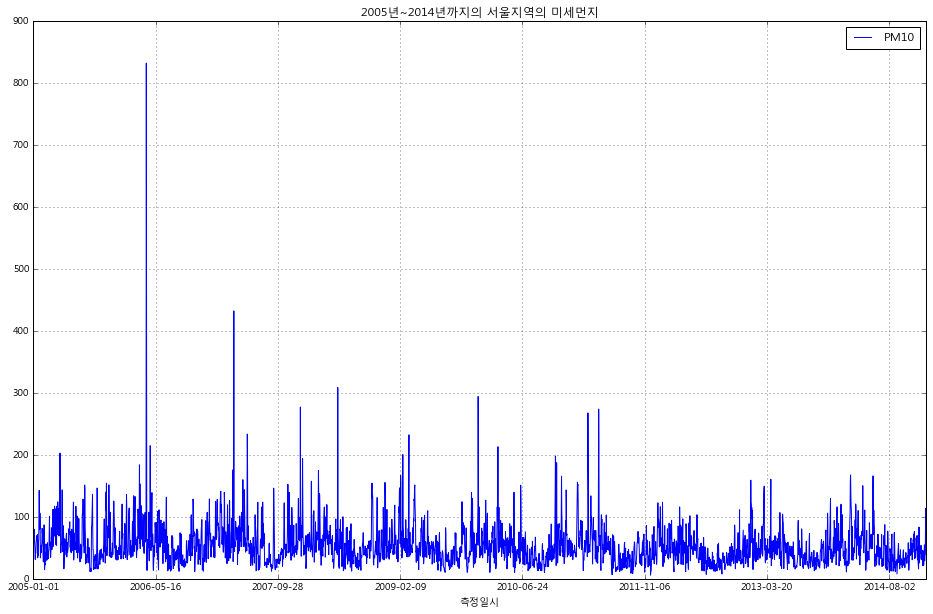

In [18]:
import matplotlib
from matplotlib import font_manager
font_name = matplotlib.font_manager.FontProperties \
            (fname='C:/Windows/Fonts/malgun.ttf').get_name()
# 한글폰트(맑은고딕)를 갖고오는 부분    

matplotlib.rc('font', family=font_name)

%matplotlib inline

result_seoul=result[result.지역.isin(['서울'])]
result_seoul=result_seoul.set_index(['측정일시'])
result_seoul.PM10.plot(figsize=(16,10), legend=True, grid=True, title="2005년~2014년까지의 서울지역의 미세먼지")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018557D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB9D6A0>]], dtype=object)

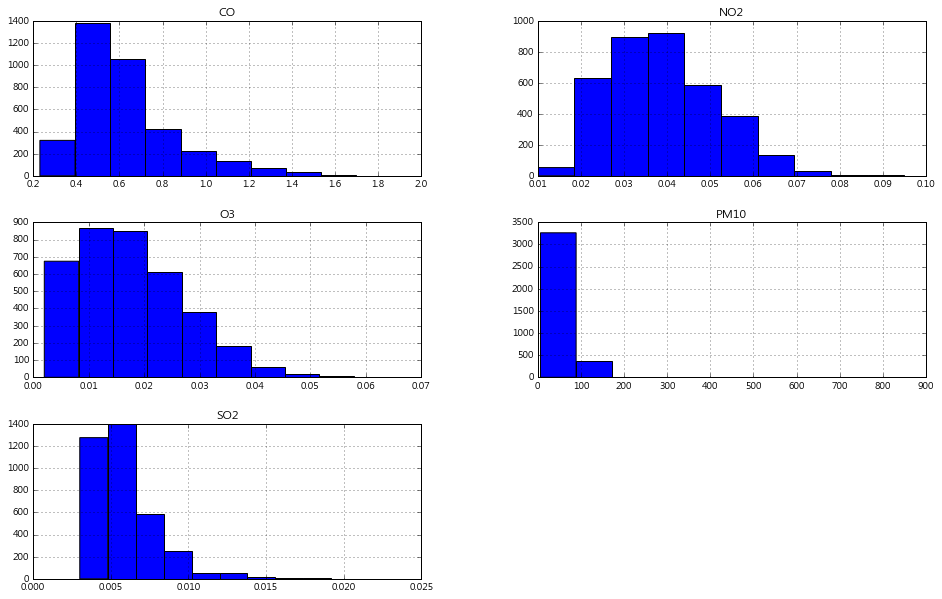

In [19]:
result_seoul.hist(figsize=(16,10))

### 위에 나타낸 것은 일별데이터 입니다.

### Q: 그럼, 경기도의 2005년~2014년까지의 월별 데이터를 이용해 히스토그램, 시계열 시각화를 나타내시오.

### 계절별 데이터 시각화

In [20]:
result_seoul=result_seoul.reset_index()

# 계절을 표시하기위해 월별로 계절을 표시
date_dict = {"01":"겨울","02":"겨울","03":"봄", "04":"봄", "05":"봄", "06":"여름", "07":"여름", "08":"여름",\
             "09":"가을","10":"가을","11":"가을","12":"겨울"}

# 측정일시의 월을 mapping을 통해 Season에 계절을 표시함
result_seoul['Season']=result_seoul.측정일시.str[5:7].map(date_dict)

In [21]:
# 각 년을 표시해서 년, 계절을 표시
result_seoul['Year']=result_seoul.측정일시.str[0:4]

In [22]:
# PM10에 대해 계절별로 나타내며 unstack함수는 Year를 칼럼에 유지시키겠다는 함수
Season=np.round(pd.DataFrame(result_seoul.groupby(['Year','Season'], sort=False)['PM10'].mean().unstack("Year")),2)
Season

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Season,,,,,,,,,,
겨울,53.66,64.51,74.71,62.69,70.42,59.14,57.14,52.75,57.95,54.93
봄,70.39,82.82,79.24,69.52,62.46,57.01,67.84,52.02,57.45,62.84
여름,61.57,46.80,45.91,39.92,41.82,40.39,35.42,31.87,39.01,37.81
가을,54.63,47.65,49.88,52.52,46.63,48.02,38.55,36.08,35.73,38.03


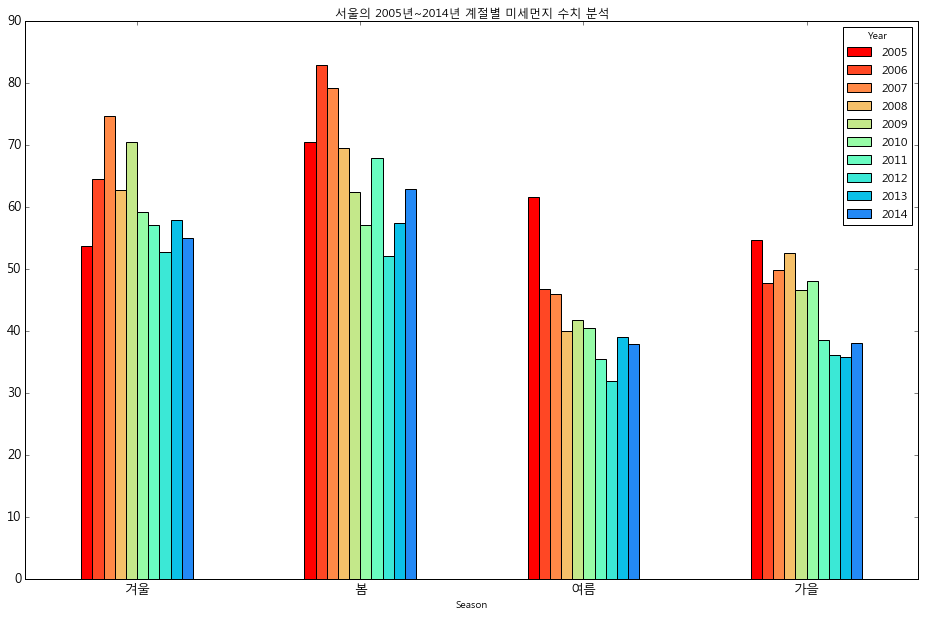

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,4))
# plt를 사용해서 Plotting할 범위를 설정

ax=fig.add_subplot(111)
colors = plt.cm.rainbow_r(np.linspace(0,1,12))
# plt의 cm계열 내 무지개 색을 이용

Season.plot(kind='bar', figsize=(16,10), title="서울의 2005년~2014년 계절별 미세먼지 수치 분석", fontsize=13, color=colors , ax=ax, rot=0)

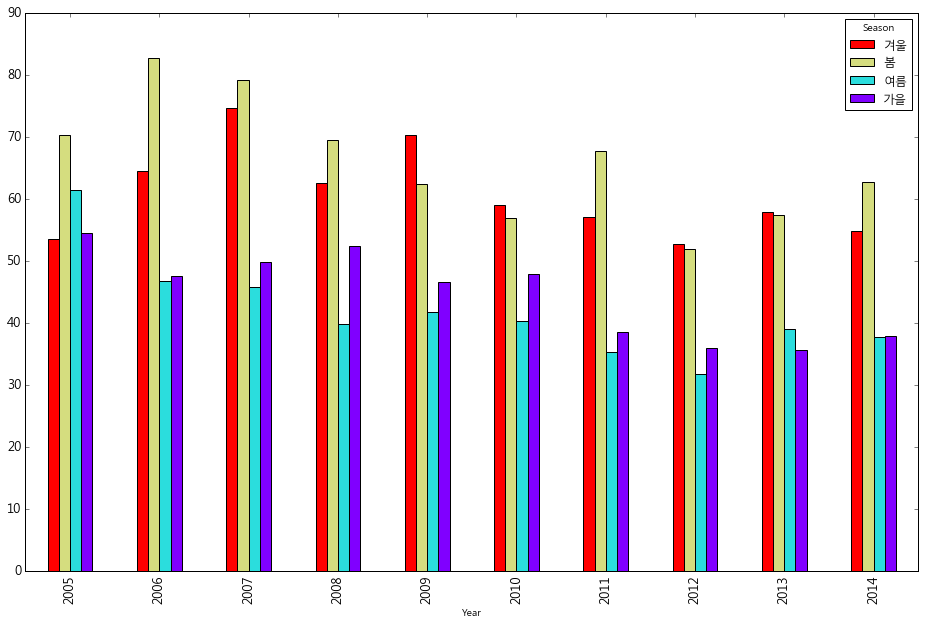

In [24]:
colors = plt.cm.rainbow_r(np.linspace(0,1,4))

# T는 행렬을 Transpormation하는 함수
Season.T.plot(kind='bar', figsize=(16,10), color=colors, fontsize=13)

In [25]:
Season

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Season,,,,,,,,,,
겨울,53.66,64.51,74.71,62.69,70.42,59.14,57.14,52.75,57.95,54.93
봄,70.39,82.82,79.24,69.52,62.46,57.01,67.84,52.02,57.45,62.84
여름,61.57,46.80,45.91,39.92,41.82,40.39,35.42,31.87,39.01,37.81
가을,54.63,47.65,49.88,52.52,46.63,48.02,38.55,36.08,35.73,38.03


In [26]:
Season.T

Season,겨울,봄,여름,가을
Year,,,,
2005,53.66,70.39,61.57,54.63
2006,64.51,82.82,46.80,47.65
2007,74.71,79.24,45.91,49.88
2008,62.69,69.52,39.92,52.52
2009,70.42,62.46,41.82,46.63
2010,59.14,57.01,40.39,48.02
2011,57.14,67.84,35.42,38.55
2012,52.75,52.02,31.87,36.08
2013,57.95,57.45,39.01,35.73
